In [1]:
%matplotlib inline

# SVM: Maximum margin separating hyperplane

Plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machine classifier with
linear kernel.


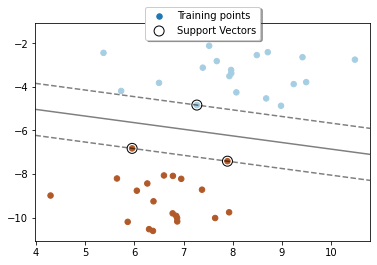

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.figure()

# plot the decision function
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired,label = 'Training points')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    label = 'Support Vectors'
)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True,
)

plt.show()

# SVM for nonlinear decision boundaries

In [3]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC
from visualization import versiontuple,plot_decision_regions

## Generate data

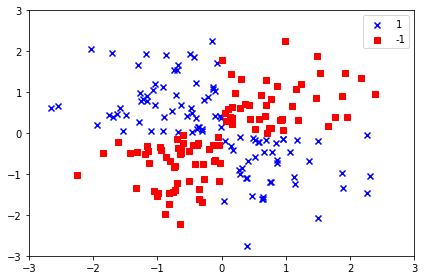

In [4]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# setup marker generator and color map
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_xor))])

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Classification using a RBF kernel

* A linear kernel is clearly insufficient to classify this complex dataset
* We use the rbf kernel given by
\begin{equation}
K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {||\mathbf {x} -\mathbf {x'} ||^{2}}{2\sigma ^{2}}}\right)
\end{equation}

* Two additional parameters must be specified: $\gamma$ and $C$  . 
  * $\gamma$ refers to the spread of the kernel, and in turn, the decision boundary. A small value indicates a very smooth kernel, whereas a large value indicates a very noisy kernel that adapts too stringently to the noise in the data
  * $C$ is called 'slack' and it refers to the penalty of misclassification if the boundary is inexact. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


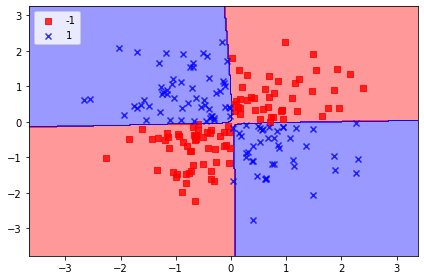

In [6]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1e4)
# Train the classifier
svm.fit(X_xor, y_xor)
# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, svm,cmap,markers, colors)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()